In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
file_path = 'analysis_df.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [5]:
print(df.head())

       File Name  Total Faces  Curved Faces  Total Edges  Vertices  \
0  00509603.step           82            21          484       968   
1  00009985.step          894           749         4279      8558   
2  00509983.step           30            20          146       292   
3  00009776.step            6             2           24        48   
4  00509729.step           12             7           58       116   

  Complexity (Face/Edge)  Bounding Box Volume  Mean Curvature  \
0                Complex        200475.002187       -0.011987   
1                Complex         18634.699104       -1.481930   
2                Complex        591300.822290       -0.157138   
3                 Simple         19648.376922        0.000278   
4                Complex        331250.003150       -0.018965   

   Curvature Std Dev Complexity (Curvature)         Volume  Hole Count  
0           0.027144                Complex   66365.469420          21  
1           1.133369                Comple

In [6]:
df.describe()

,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count
count,64.000000,64.000000,64.000000,64.000000,6.400000e+01,63.000000,63.000000,64.000000,64.000000
mean,142.890625,54.671875,758.531250,1517.062500,2.486945e+05,-0.123214,0.182560,60826.173329,29.078125
std,455.423756,115.876652,2389.080888,4778.161777,5.313386e+05,0.221035,0.221212,153258.018441,48.813641
min,0.000000,0.000000,1.000000,2.000000,8.012551e+01,-1.481930,0.000000,0.000000,0.000000
25%,23.500000,6.750000,106.500000,213.000000,9.804431e+03,-0.128515,0.056456,3534.577032,4.000000
50%,40.000000,16.500000,231.000000,462.000000,3.155903e+04,-0.076860,0.114038,8657.040529,12.000000
75%,106.500000,48.750000,578.250000,1156.500000,1.286658e+05,-0.024515,0.197882,38018.790179,29.750000
max,3557.000000,749.000000,18780.000000,37560.000000,2.611564e+06,0.126636,1.133369,966928.738586,295.000000


In [ ]:
print("\nCorrelation matrix:")
correlation_matrix = df.corr()
print(correlation_matrix)
sns.set(style="whitegrid")


Correlation matrix:


ValueError: could not convert string to float: '00509603.step'

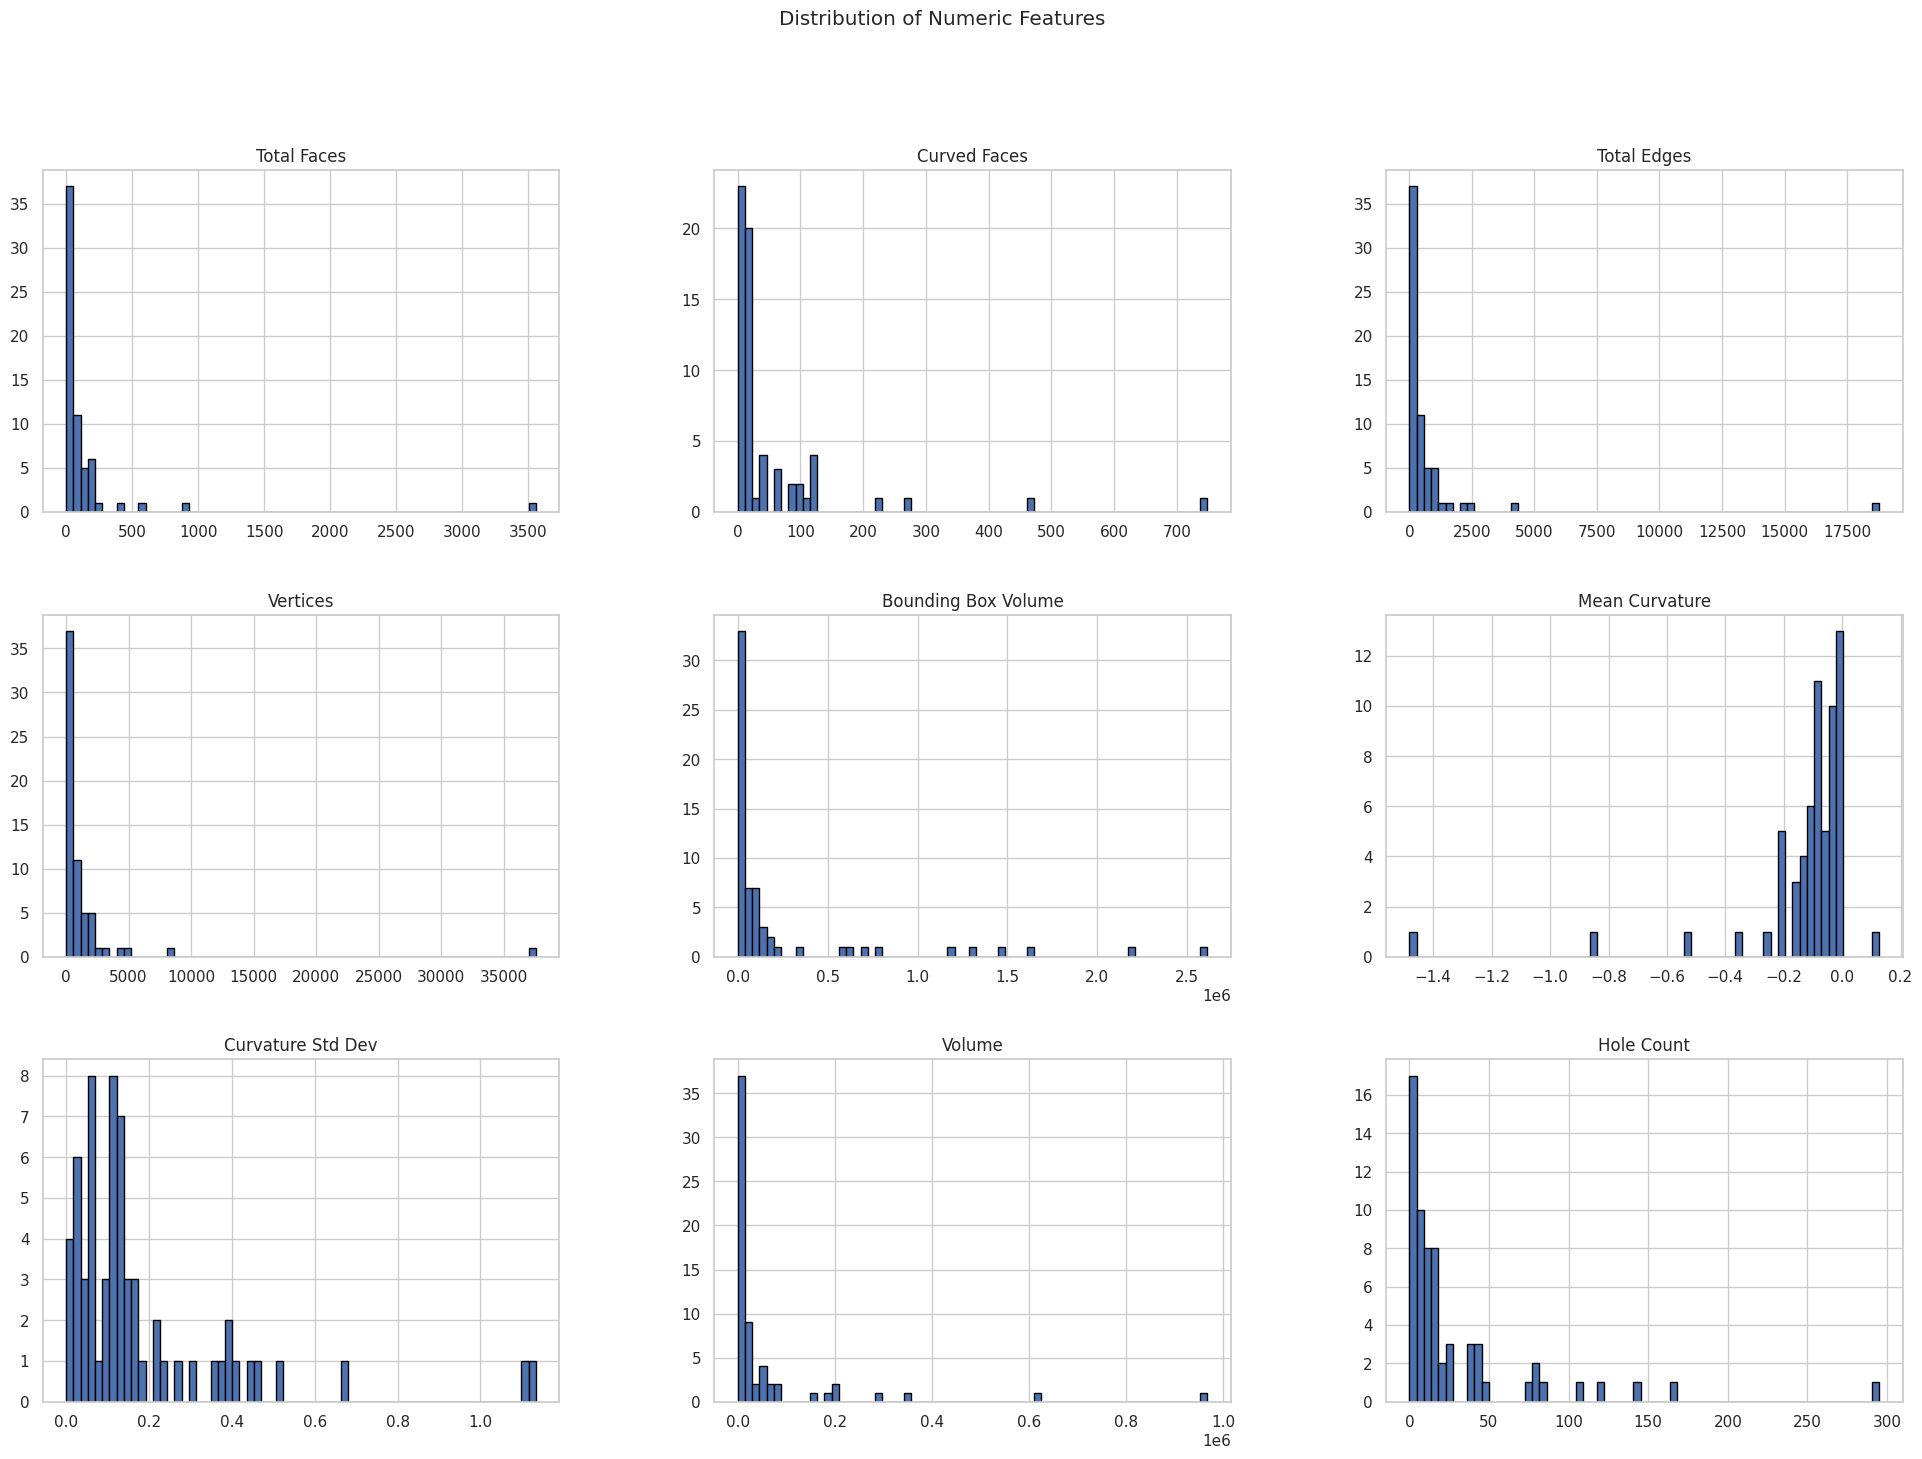

In [12]:
numeric_columns = ['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices', 'Bounding Box Volume', 
                   'Mean Curvature', 'Curvature Std Dev', 'Volume', 'Hole Count']

df[numeric_columns].hist(bins=65, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

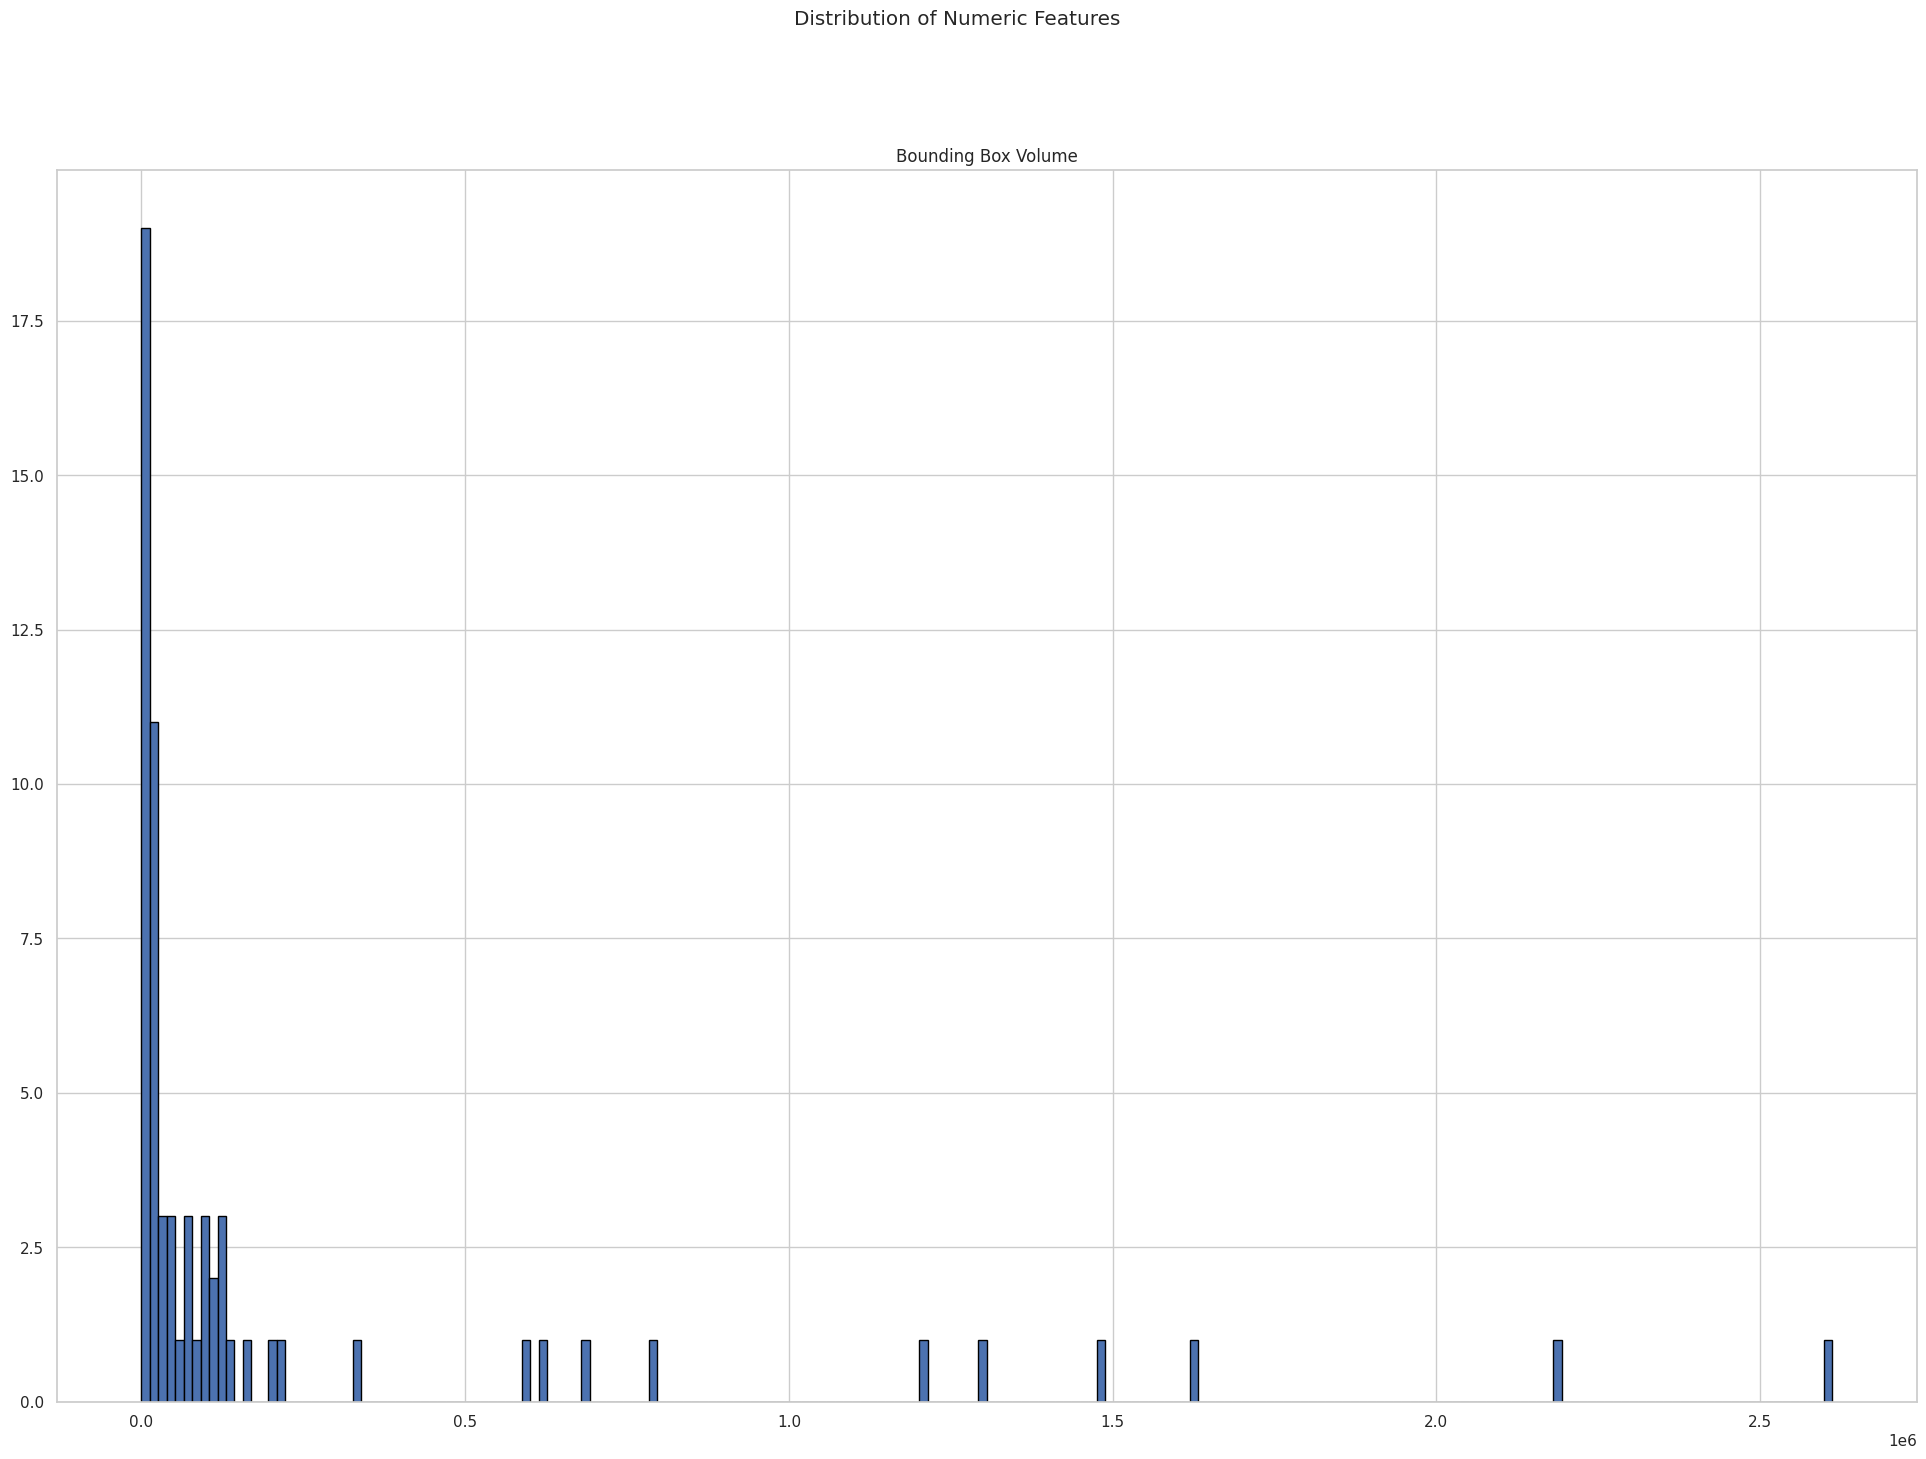

In [20]:
numeric_columns = ['Bounding Box Volume']

df[numeric_columns].hist(bins=200, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

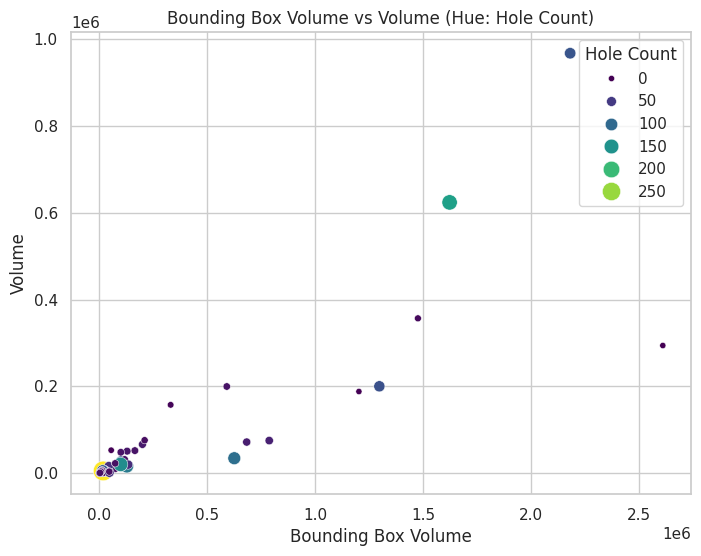

In [21]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bounding Box Volume', y='Volume', data=df, hue='Hole Count', palette='viridis', size='Hole Count', sizes=(20, 200))
plt.title('Bounding Box Volume vs Volume (Hue: Hole Count)')
plt.xlabel('Bounding Box Volume')
plt.ylabel('Volume')
plt.legend(title='Hole Count')
plt.show()

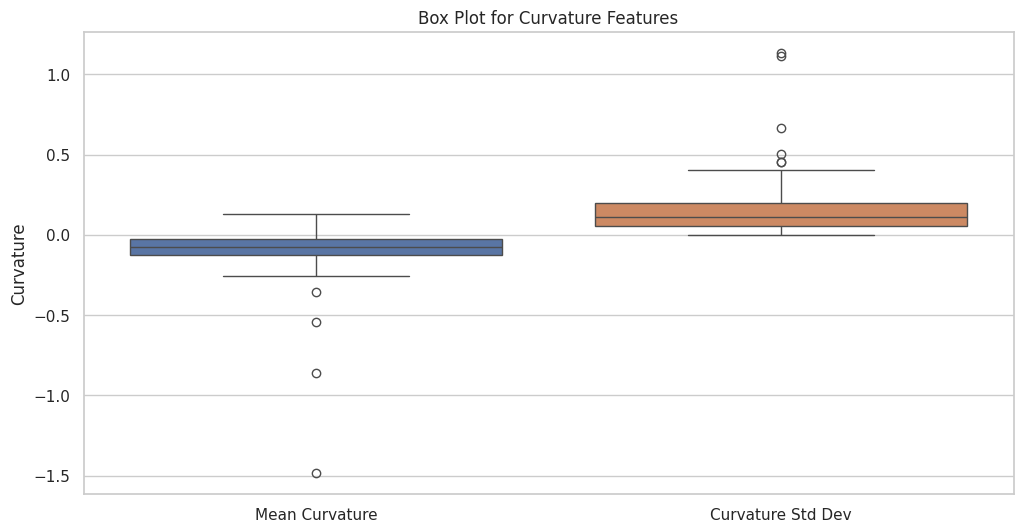

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Mean Curvature', 'Curvature Std Dev']])
plt.title('Box Plot for Curvature Features')
plt.ylabel('Curvature')
plt.show()

In [23]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>